<a href="https://colab.research.google.com/github/JMartinArocha/MasterBigData/blob/main/2%204%20Observaciones%20influyentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo 2 4:** Determinación de observaciones influyentes
# Jose Martin de la Fuente Arocha

---



**PROBLEMA**: Queremos averiguar si existe algún dato  influyente para los procedimientos estadísticos de calcular la **media** y la **mediana**.
> Vamos a generar una muestra simulando los ingresos de un vecindario. Supongamos que hay un vecino con unos ingresos signficativamente altos.



In [23]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Generación de datos
# ==============================================================================
# Generamos (100 elementos) ingresos uniformemente distribuidos en [15000,25000]
datos = 15000+np.random.rand(100)*10000
datos_ord = datos
datos_ord.sort()
datos

array([15015.79024247, 15217.00695046, 15227.68142822, 15370.17634592,
       15429.59312809, 15815.42279318, 15871.23362266, 16058.43901521,
       16112.22899514, 16156.7185854 , 16373.82971865, 16524.88121539,
       16614.73306967, 16697.71536462, 16764.80573722, 16820.29316512,
       17070.69577298, 17071.65316719, 17104.01087005, 17176.07437747,
       17313.60622775, 17437.8070221 , 17441.92228989, 17488.22154106,
       17489.95954174, 17566.36239716, 17773.13548422, 17968.97936099,
       17983.46904693, 18027.67107482, 18353.90629016, 18366.28277795,
       18374.79984059, 18389.44525704, 18576.35515132, 18589.61868167,
       18596.3382233 , 18605.96912564, 18987.99055363, 19029.62225441,
       19223.42378757, 19356.43388812, 19551.90709424, 19694.38933343,
       19768.72527495, 19890.03694949, 19905.27406684, 19914.0974481 ,
       19915.78778457, 20001.0625568 , 20118.66442397, 20122.24201429,
       20193.9067709 , 20296.97890275, 20699.01533904, 20729.70119573,
      

**Ejercicio**: Calcular la media y la mediana antes de realizar la modificación de incluir unos ingresos de 500.000€

In [24]:
# Calculo de la media
media = np.mean(datos)

# Cálculo de la mediana
mediana = np.median(datos)

print(f" Media= {media} y Mediana={mediana}")

 Media= 20188.97058697104 y Mediana=20059.863490386022


In [31]:
# El vecino 50 tiene unos ingresos significativamente mayores que el resto
datos[50]=500000
datos

array([ 15015.79024247,  15217.00695046,  15227.68142822,  15370.17634592,
        15429.59312809,  15815.42279318,  15871.23362266,  16058.43901521,
        16112.22899514,  16156.7185854 ,  16373.82971865,  16524.88121539,
        16614.73306967,  16697.71536462,  16764.80573722,  16820.29316512,
        17070.69577298,  17071.65316719,  17104.01087005,  17176.07437747,
        17313.60622775,  17437.8070221 ,  17441.92228989,  17488.22154106,
        17489.95954174,  17566.36239716,  17773.13548422,  17968.97936099,
        17983.46904693,  18027.67107482,  18353.90629016,  18366.28277795,
        18374.79984059,  18389.44525704,  18576.35515132,  18589.61868167,
        18596.3382233 ,  18605.96912564,  18987.99055363,  19029.62225441,
        19223.42378757,  19356.43388812,  19551.90709424,  19694.38933343,
        19768.72527495,  19890.03694949,  19905.27406684,  19914.0974481 ,
        19915.78778457,  20001.0625568 , 500000.        ,  20122.24201429,
        20193.9067709 ,  

Cálculo de media y mediana en toda la muestra

In [32]:
media=  np.mean(datos)
mediana=  np.median (datos) # Es el valor central cuando los datos se ordenan
print(f" Media= {media} y Mediana={mediana}")

 Media= 24987.783942731327 y Mediana=20061.652285544107


Notar que los ingresos del barrio son aprox. 20000 euros. El hecho que se haya trasladado un vecino rico ha incrementando aprox. en 5000 euros la media. La mediana es insensible a este hecho. Se trata de identificar que datos son influyentess para los dos procedimientos estadísticos

Ejercicio: Aplicar el método de describe para ver un resumen estadístico de los datos.

In [33]:
# Insertar el código aquí
import pandas as pd

# Creando un DataFrame de pandas a partir del array
df = pd.DataFrame(datos, columns=['Datos'])

# Utilizando el método 'describe' para obtener un resumen estadístico
resumen_estadistico = df.describe()
resumen_estadistico

,Datos
count,100.000000
mean,24987.783943
std,48068.219297
min,15015.790242
25%,17547.261683
50%,20061.652286
75%,22940.591178
max,500000.000000


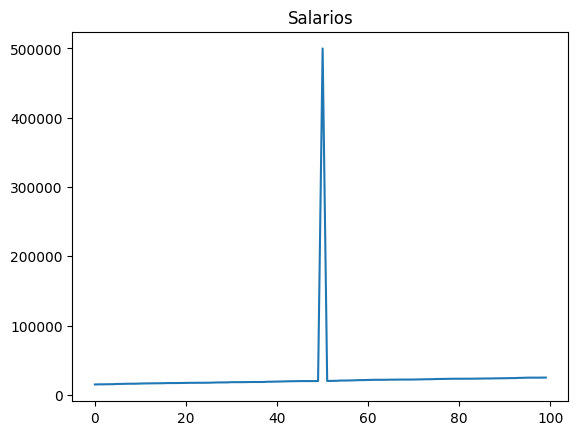

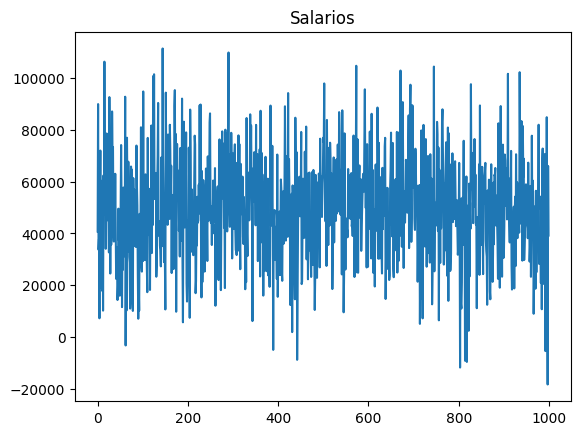

In [54]:
median = df['Datos'].median()
mean = df['Datos'].mean()
std = df['Datos'].std()
size = 1000 # Tamaño de la muestra
gausianDistribution = np.random.normal(std, median, size) # Distribución Gausiana


import matplotlib.pyplot as plt
# Muestra de datos originales
x = [x for x in range(len(datos))]
plt.plot(x, datos, '-')
plt.title("Salarios")
plt.show()

# Muestra de datos calculados
x = [x for x in range(len(gausianDistribution))]
plt.plot(x, gausianDistribution, '-')
plt.title("Salarios")
plt.show()

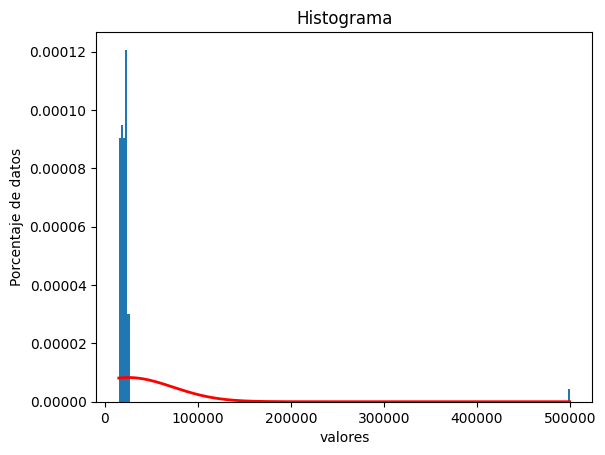

In [55]:
# Muestra de datos calculados
# bins: Es el número de secciones/barras que se mostrará en la gráfica
# density: Muestra la línera roja que indica la densidad (número de puntos) de los grupos creados a partir del parámetro bins

# Histograma
count, bins, ignored = plt.hist(datos, bins='auto', density=True)

# Curva de distribución normal
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ), linewidth=2, color='r')
# plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - median)**2 / (2 * std**2) ), linewidth=2, color='r')
plt.ylabel('Porcentaje de datos')
plt.xlabel('valores')
plt.title("Histograma")
plt.show()

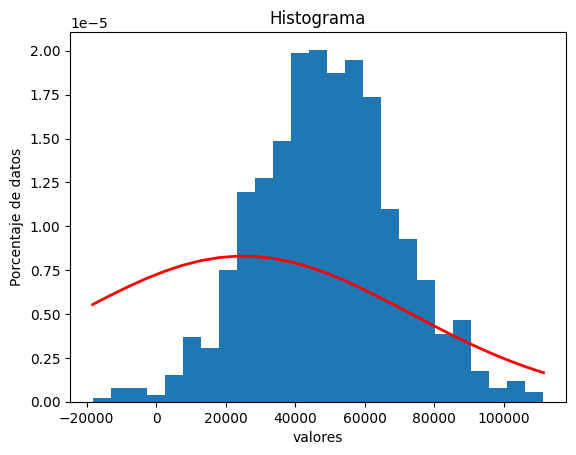

In [56]:
# Muestra de datos calculados
# bins: Es el número de secciones/barras que se mostrará en la gráfica
# density: Muestra la línera roja que indica la densidad (número de puntos) de los grupos creados a partir del parámetro bins

# Histograma
count, bins, ignored = plt.hist(gausianDistribution, bins='auto', density=True)

# Curva de distribución normal
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ), linewidth=2, color='r')
# plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - median)**2 / (2 * std**2) ), linewidth=2, color='r')

plt.ylabel('Porcentaje de datos')
plt.xlabel('valores')
plt.title("Histograma")
plt.show()


**Ejercicio**: Aplicar el método de Probabilidad global, para detectar los outliers utilizado en el ejemplo 2_3_Outliers

In [57]:
# CRITERIO 1: PROBABILIDAD GLOBAL - Explicado en el capítulo 5 - Preprocesamiento (Semana 2), en la pág 10
# Asumiendo que las variables tiene una distribución normal.
# Probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global
alfa_g=(1-p_g)/2
# probabilidad  para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos)) # Se realiza este ajuste para ser más precisos.
#alfa = alfa_g # Si no realiza la corrección de la línea anterior entonces hubiese detectado más valores que son outliers cuando realmente no lo son. Descomentar esta línea para ver el resultado, que es el mismo que el obtenidoi con el método 2 de este código.
                # con esta corrección lo que se pretende es obtener bandas lo sificientemente anchas.

alfa=round(alfa,5)
print(f" Alfa ={alfa}")
xL=  round(np.mean(datos)-alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+alfa*  np.std(datos),4)

# xL=  round(np.median(datos)-alfa*  np.std(datos),4)
# xU=  round(np.median(datos)+alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")

 Alfa =0.00025
 Banda= [ 24975.8271,24999.7408]
 El dato[0]=15015.790242472021 es un outlier
 El dato[1]=15217.006950458635 es un outlier
 El dato[2]=15227.681428224772 es un outlier
 El dato[3]=15370.17634592053 es un outlier
 El dato[4]=15429.593128089087 es un outlier
 El dato[5]=15815.422793177871 es un outlier
 El dato[6]=15871.233622659338 es un outlier
 El dato[7]=16058.439015206912 es un outlier
 El dato[8]=16112.228995135147 es un outlier
 El dato[9]=16156.718585402636 es un outlier
 El dato[10]=16373.829718647634 es un outlier
 El dato[11]=16524.881215392696 es un outlier
 El dato[12]=16614.733069672464 es un outlier
 El dato[13]=16697.715364621345 es un outlier
 El dato[14]=16764.805737221825 es un outlier
 El dato[15]=16820.293165124207 es un outlier
 El dato[16]=17070.695772981537 es un outlier
 El dato[17]=17071.653167192937 es un outlier
 El dato[18]=17104.010870051152 es un outlier
 El dato[19]=17176.07437746696 es un outlier
 El dato[20]=17313.606227745993 es un outlie

Otra forma de detactar los outliers

**Método :**  Detectemos los outlier de phi medinate el método Jackknife y a continuación aplicamos el método de la distancia entre Quartiles

In [58]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, es decir, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.mean(datos_sin_i)
phi

array([25088.51115182, 25086.47865982, 25086.37083682, 25084.93149421,
       25084.3313247 , 25080.43405535, 25079.8703096 , 25077.97934604,
       25077.43601291, 25076.98662311, 25074.79358136, 25073.26780866,
       25072.36021418, 25071.52200918, 25070.84432865, 25070.28384958,
       25067.7545303 , 25067.74485966, 25067.41801417, 25066.69009996,
       25065.30088935, 25064.04633587, 25064.00476751, 25063.5370983 ,
       25063.51954274, 25062.74779673, 25060.65917969, 25058.68095871,
       25058.53459824, 25058.08811311, 25054.79280791, 25054.66779288,
       25054.58176194, 25054.43382845, 25052.54584972, 25052.41187466,
       25052.3440005 , 25052.24671866, 25048.38791636, 25047.96739413,
       25046.00980288, 25044.66626652, 25042.69178969, 25041.25257515,
       25040.50170705, 25039.2763366 , 25039.12242633, 25039.03330126,
       25039.01622716, 25038.15486582, 20189.68075023, 25036.9308309 ,
       25036.20694447, 25035.16581182, 25031.10483772, 25030.79487957,
      

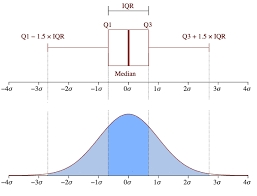

In [59]:
# Aplicamos el método de la distancia entre cuartiles, en este caso, al aplicar el método Jackknife no obtenemos
# el valor del elemento que es considerado Outlier, sino la posición del mismo.
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la media")

 El dato 50 es una observación influyente para la media


In [60]:
pd.DataFrame(phi).describe()

,0
count,100.000000
mean,24987.783943
std,485.537569
min,20189.680750
25%,25008.462658
50%,25037.542848
75%,25062.940733
max,25088.511152


**Ejercicio**: Repetir el mismo procedimiento (método Jackenife) de detectar los outliers pero con la mediana en lugar de con la media: ¿Qué ocurre? ¿observas variaciones?

In [63]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, es decir, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.median(datos_sin_i)
print(phi)

# Aplicamos el método de la distancia entre cuartiles, en este caso, al aplicar el método Jackknife no obtenemos
# el valor del elemento que es considerado Outlier, sino la posición del mismo.
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la mediana")

# pd.DataFrame(phi).describe()

[20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20122.24201429 20122.24201429
 20122.24201429 20122.24201429 20001.0625568  20001.0625568
 20001.0625568  20001.0625568  20001.0625568  20001.0625568
 20001.0625568  20001.0625568  20001.0625568  20001.0625568
 20001.0625568  20001.0625568  20001.0625568  20001.0625568
 20001.0625568  20001.062556